# Introduction

In [1]:
# Import Modules
import pandas as pd
from datasets import load_dataset
from sklearn.manifold import TSNE

# Sentence Transformers
import torch
from sentence_transformers import SentenceTransformer

# Wordcloud
from wordcloud import WordCloud

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\robin\Environments\SlmLlm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset and Labels

In [2]:
# Load AG News dataset
dataset = load_dataset("ag_news")

# Convert to Pandas DataFrame
df_train = dataset["train"].to_pandas()
df_test = dataset["test"].to_pandas()

# Class Labels
label_names = ['World', 'Sports', 'Business', 'Sci/Tech']
df_train['label_name'] = df_train['label'].apply(lambda x: label_names[x])
df_test['label_name'] = df_test['label'].apply(lambda x: label_names[x])

# Dataset Sizes
print("Train size:", len(df_train))
print("Test size:", len(df_test))

Train size: 120000
Test size: 7600


## Label Counts

In [3]:
# Label Distribution
train_label_counts = df_train['label_name'].value_counts()
test_label_counts = df_test['label_name'].value_counts()
print("\nTrain Label distribution:\n", train_label_counts)
print("\nTest Label distribution:\n", test_label_counts)


Train Label distribution:
 label_name
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64

Test Label distribution:
 label_name
Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: count, dtype: int64


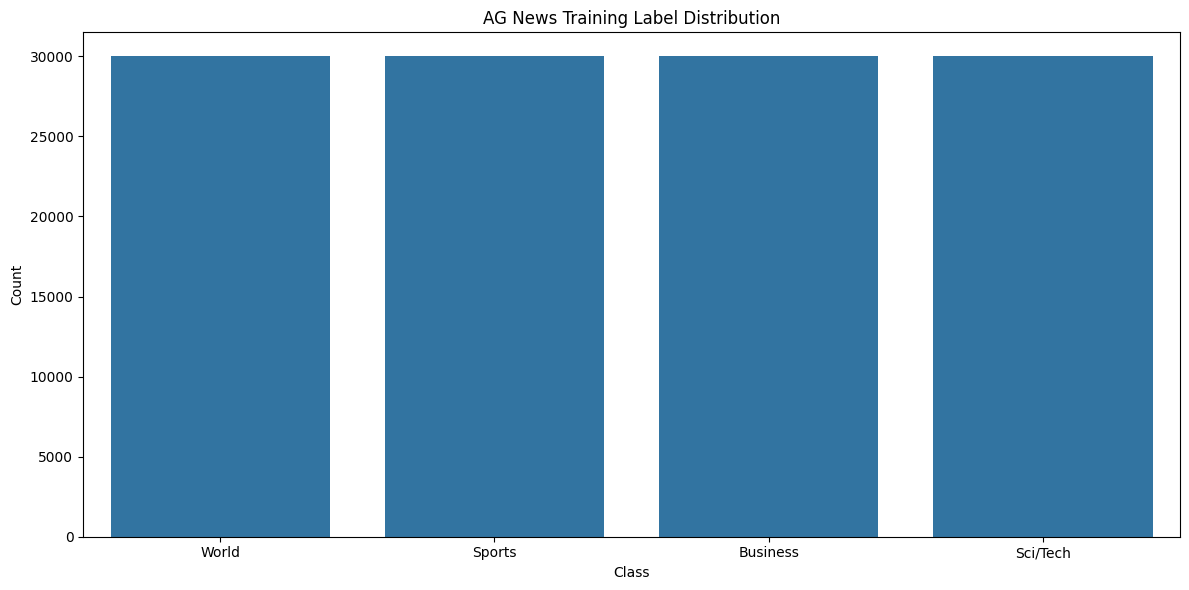

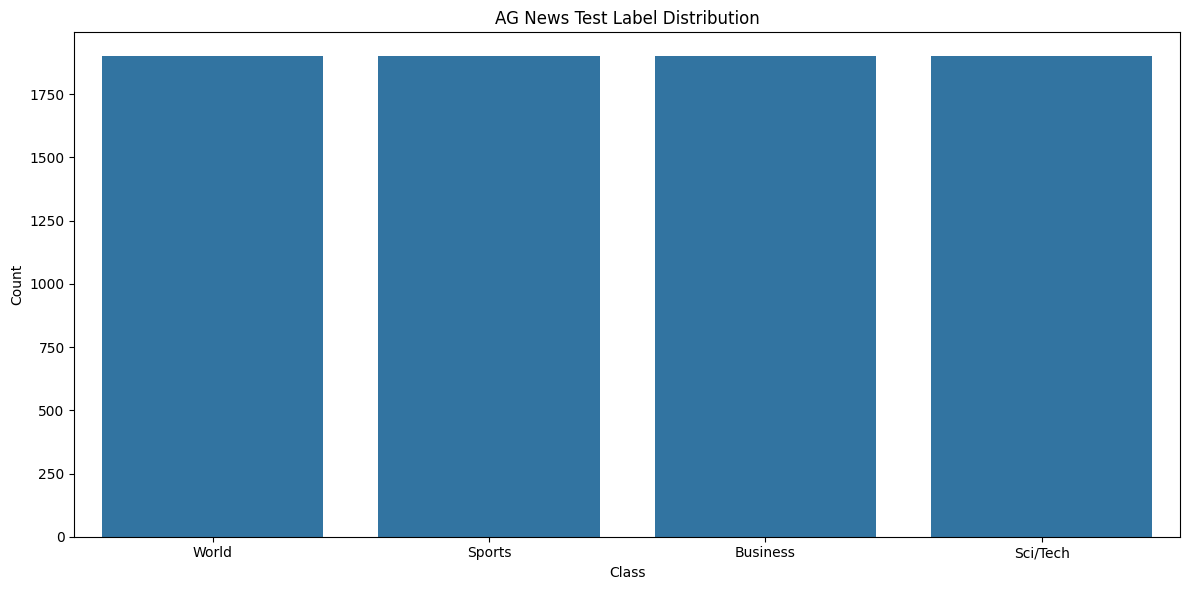

In [4]:
# Bar Plot of Train Label Counts
plt.figure(figsize = (12, 6))
sns.countplot(data = df_train, x = 'label_name', order = label_names)
plt.title("AG News Training Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Bar Plot of Test Label Counts
plt.figure(figsize = (12, 6))
sns.countplot(data = df_test, x = 'label_name', order = label_names)
plt.title("AG News Test Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Plot Word Counts and Samples

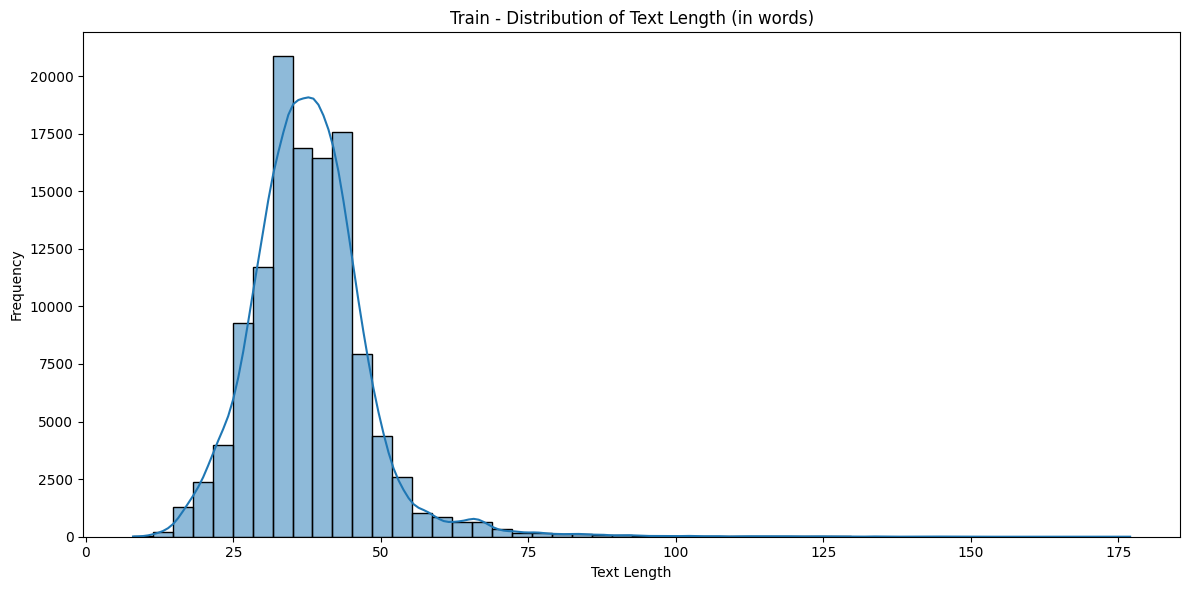


Examples per class:

Label: World
Text: Explosion Rocks Baghdad Neighborhood BAGHDAD, Iraq, August 24 -- A car bomb exploded near the gate of a US-funded Iraqi television network in Baghdad on Tuesday, killing at least two people and wounding two others, authorities and witnesses said.

Label: Sports
Text: Second Andre win in a row boosts US gold medal hopes Andre Dirrell, fighting with a tattoo of his grandfather #39;s face on his back, assured the United States of at least two boxing medals Wednesday by narrowly beating Cuba #39;s Yordani Despaigne to advance to the Olympic middleweight semifinals.

Label: Business
Text: US house sales fall in July Sales of non-new houses in the US fell last month but still exceeded analyst forecasts.

Label: Sci/Tech
Text: Gartner optimistic about chip numbers But that optimism isn #39;t matched by Infineon, which said that while the market worldwide remains buoyant, the US is a special case and cautioned that growth might not be as strong as it ex

In [5]:
# Train Text Length Analysis
df_train['text_length'] = df_train['text'].apply(lambda x: len(x.split()))

plt.figure(figsize = (12, 6))
sns.histplot(df_train['text_length'], bins = 50, kde = True)
plt.title("Train - Distribution of Text Length (in words)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Train Examples per Class
print("\nExamples per class:\n")
for label in label_names:
    sample = df_train[df_train['label_name'] == label].sample(1, random_state = 42)
    print(f"Label: {label}\nText: {sample['text'].values[0]}\n")

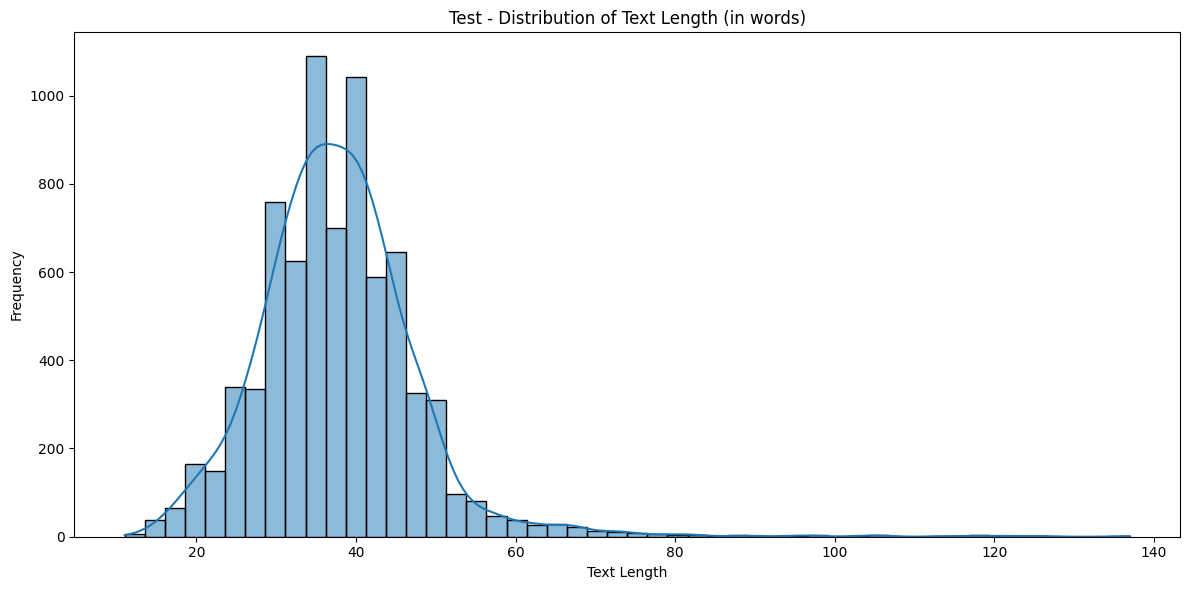


Examples per class:

Label: World
Text: Large Explosion Heard in Central Baghdad (Reuters) Reuters - A large blast was heard in central\Baghdad on Thursday, witnesses said.

Label: Sports
Text: Agassi Overcomes Verdasco Power  STOCKHOLM (Reuters) - Andre Agassi marched into the  Stockholm Open semifinals Friday, beating Spanish eighth seed  Fernando Verdasco 7-6, 6-2 in his toughest match of the  tournament.

Label: Business
Text: Ford: Monthly Sales Drop, Company Looks To New Vehicles Cruising along the ever-stretching road of decline. Auto giant Ford Motor (nyse: F - news - people ) reported vehicle sales in October that fell 5 from a year ago.

Label: Sci/Tech
Text: China Closes 1,600 Internet Cafes in Crackdown China shut 1,600 Internet cafes between February and August and imposed \$12.1 million worth of fines for allowing children to play violent or adult-only games and other violations, state media said.



In [6]:
# Test Text Length Analysis
df_test['text_length'] = df_test['text'].apply(lambda x: len(x.split()))

plt.figure(figsize = (12, 6))
sns.histplot(df_test['text_length'], bins = 50, kde = True)
plt.title("Test - Distribution of Text Length (in words)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Test Examples per Class
print("\nExamples per class:\n")
for label in label_names:
    sample = df_test[df_test['label_name'] == label].sample(1, random_state = 42)
    print(f"Label: {label}\nText: {sample['text'].values[0]}\n")

## Plot Character Counts

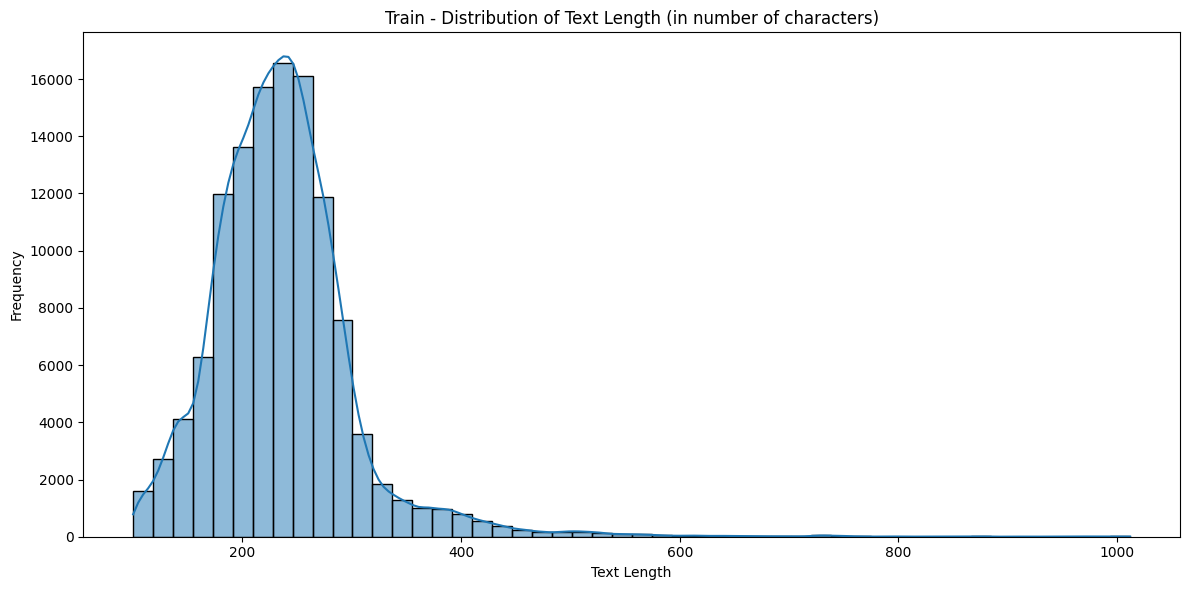

In [7]:
# Train Text Length Analysis
df_train['character_count'] = df_train['text'].apply(len)

plt.figure(figsize = (12, 6))
sns.histplot(df_train['character_count'], bins = 50, kde = True)
plt.title("Train - Distribution of Text Length (in number of characters)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

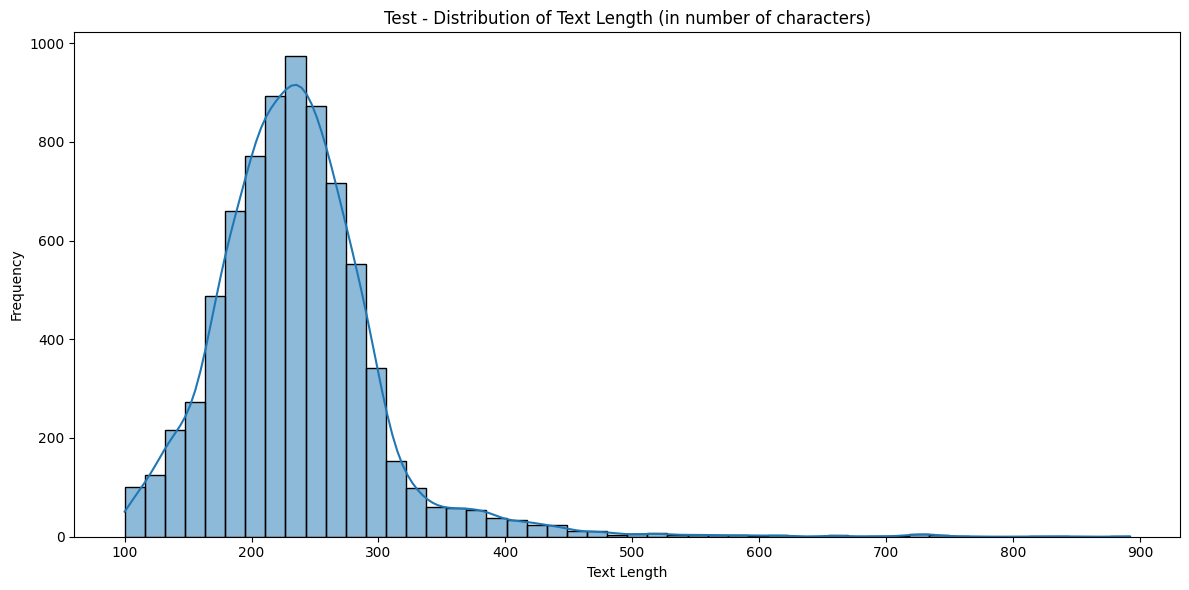

In [8]:
# Test Text Length Analysis
df_test['character_count'] = df_test['text'].apply(len)

plt.figure(figsize = (12, 6))
sns.histplot(df_test['character_count'], bins = 50, kde = True)
plt.title("Test - Distribution of Text Length (in number of characters)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## WordCloud

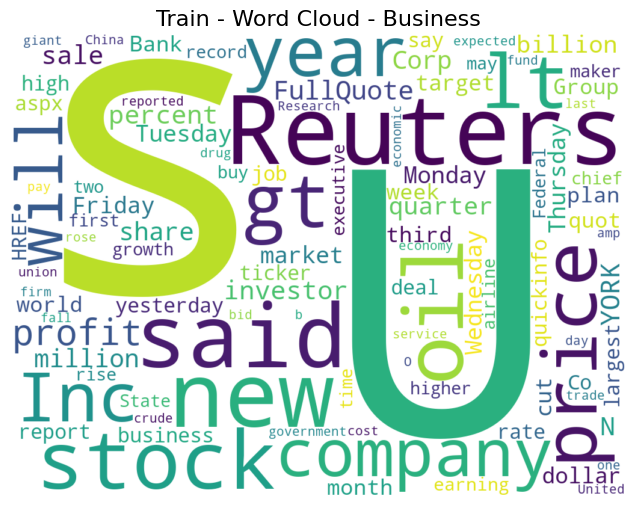

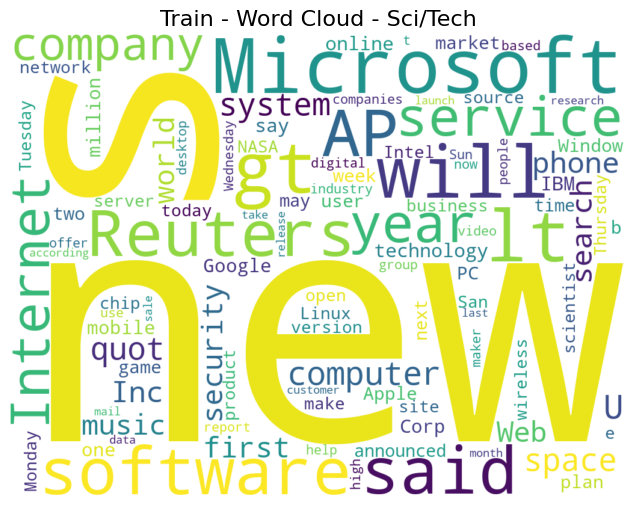

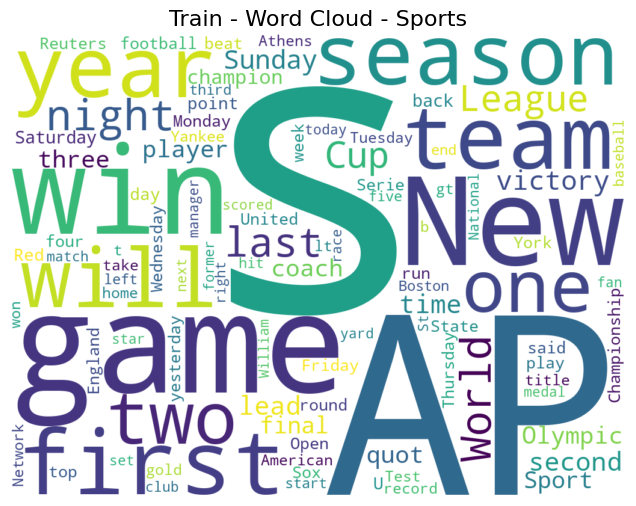

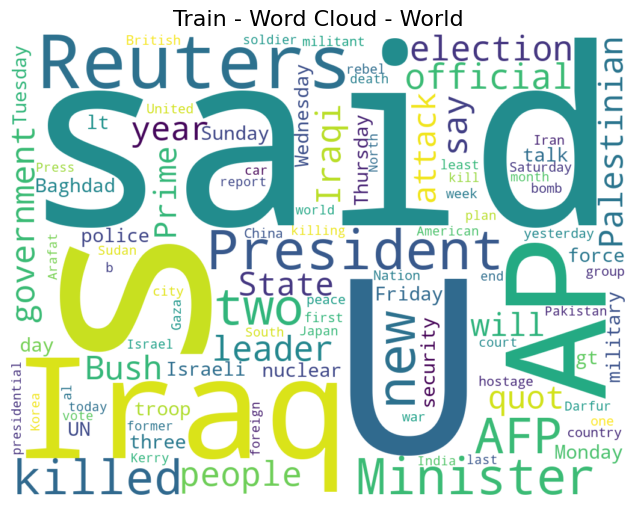

In [9]:
# Group texts by label
train_grouped_texts = df_train.groupby('label_name')['text'].apply(lambda texts: ' '.join(texts)).to_dict()

# Generate word clouds
for label, text in train_grouped_texts.items():
    wordcloud = WordCloud(width = 1024, height = 768, background_color = 'white', max_words = 100, collocations = False).generate(text)
    plt.figure(figsize = (12, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f"Train - Word Cloud - {label}", fontsize = 16)
    plt.show()

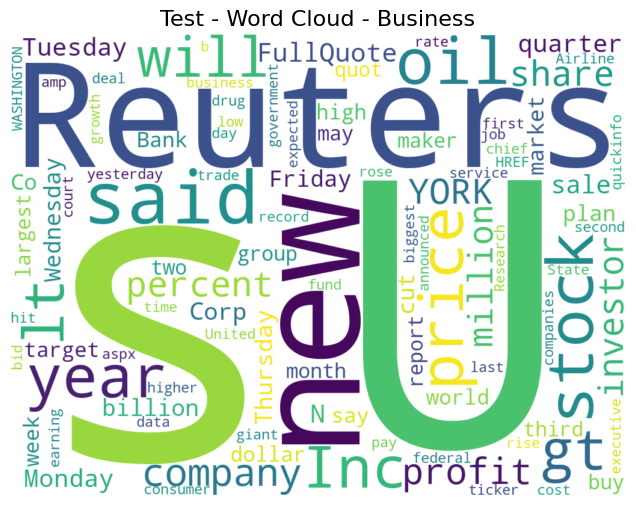

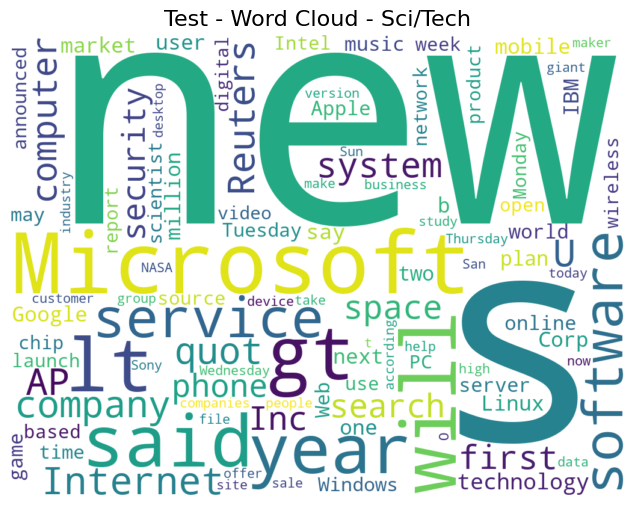

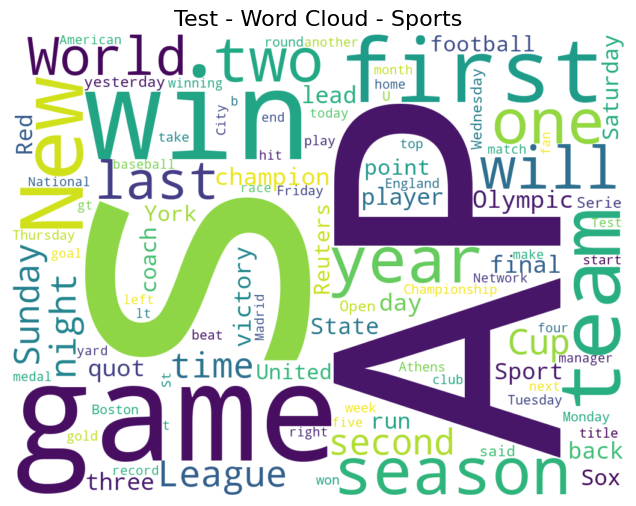

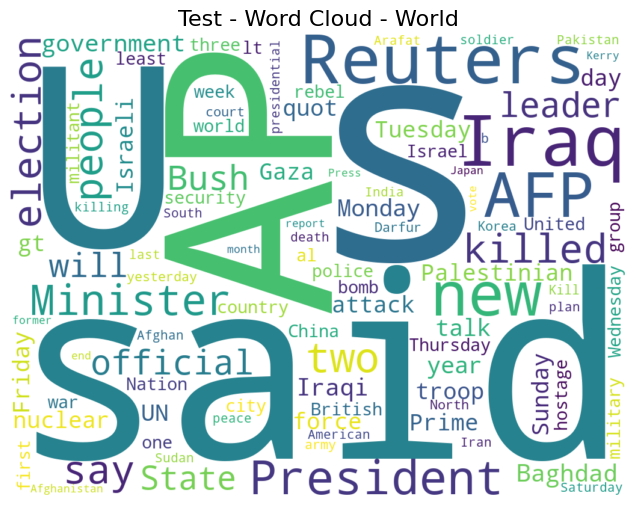

In [10]:
# Group texts by label
test_grouped_texts = df_test.groupby('label_name')['text'].apply(lambda texts: ' '.join(texts)).to_dict()

# Generate word clouds
for label, text in test_grouped_texts.items():
    wordcloud = WordCloud(width = 1024, height = 768, background_color = 'white', max_words = 100, collocations = False).generate(text)
    plt.figure(figsize = (12, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f"Test - Word Cloud - {label}", fontsize = 16)
    plt.show()

## Embeddings and t-SNE Distribution Plot

In [11]:
# Load Sentence-Transformers model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "BAAI/bge-m3"
st_model = SentenceTransformer(model_name, device = device)

# Embed text in batches
def embed(texts, model, batch_size = 16, normalize = False):
    embeddings = model.encode(texts,
                              batch_size = batch_size,
                              convert_to_numpy = True,
                              normalize_embeddings = normalize,
                              show_progress_bar = True)
    return embeddings

# Plot t-SNE Distribution
def plot_projection(data_2d, title, df):
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x = data_2d[:, 0], y = data_2d[:, 1], hue = df["label_name"], palette = "tab10", alpha = 0.5)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Class")
    plt.tight_layout()
    plt.show()

Batches: 100%|██████████| 250/250 [01:02<00:00,  3.98it/s]


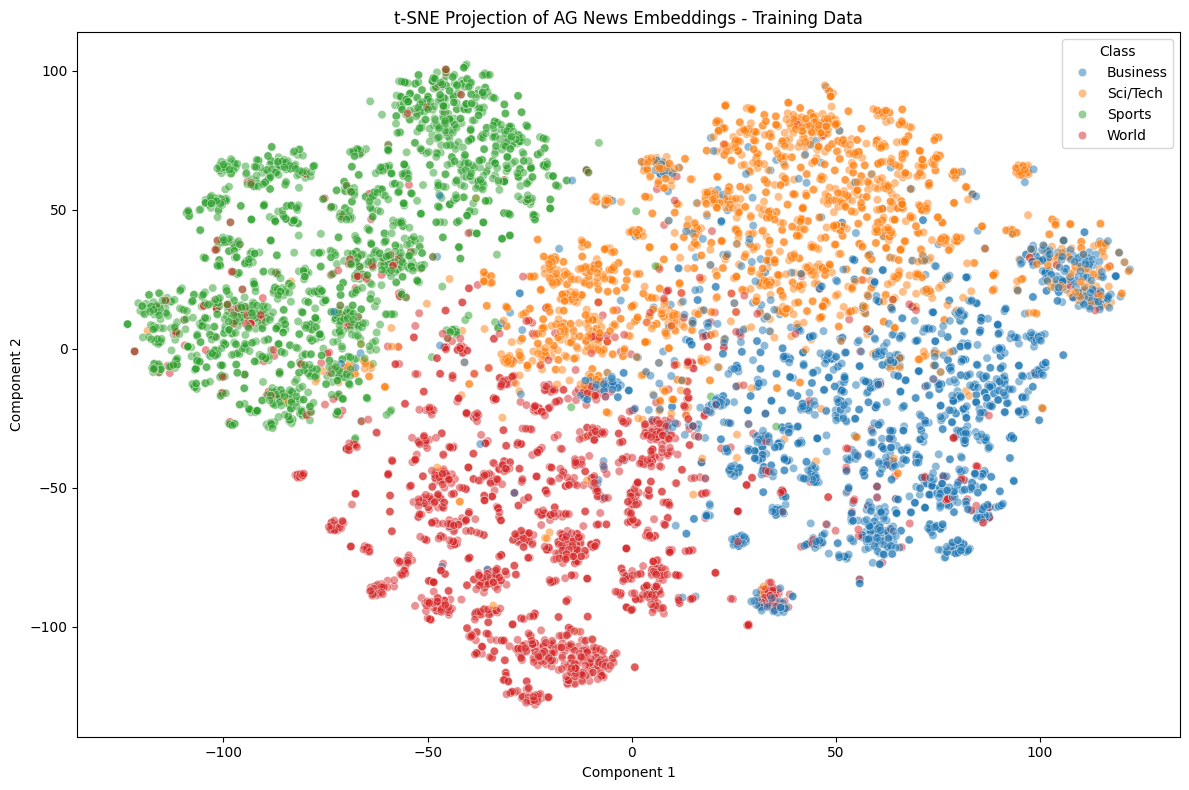

In [12]:
# TEMP
df_train = df_train[:8000]

# Create Train Embeddings
train_embeddings = embed(df_train["text"].tolist(), st_model, batch_size = 32, normalize = False)
df_train_emb = pd.DataFrame(train_embeddings)

# Create Train t-SNE Model
tsne_model = TSNE(n_components = 2, random_state = 42, perplexity = 30, max_iter = 2500)
tsne_2d = tsne_model.fit_transform(df_train_emb)

# Show plot
plot_projection(tsne_2d, "t-SNE Projection of AG News Embeddings - Training Data", df_train)

Batches: 100%|██████████| 238/238 [00:56<00:00,  4.20it/s]


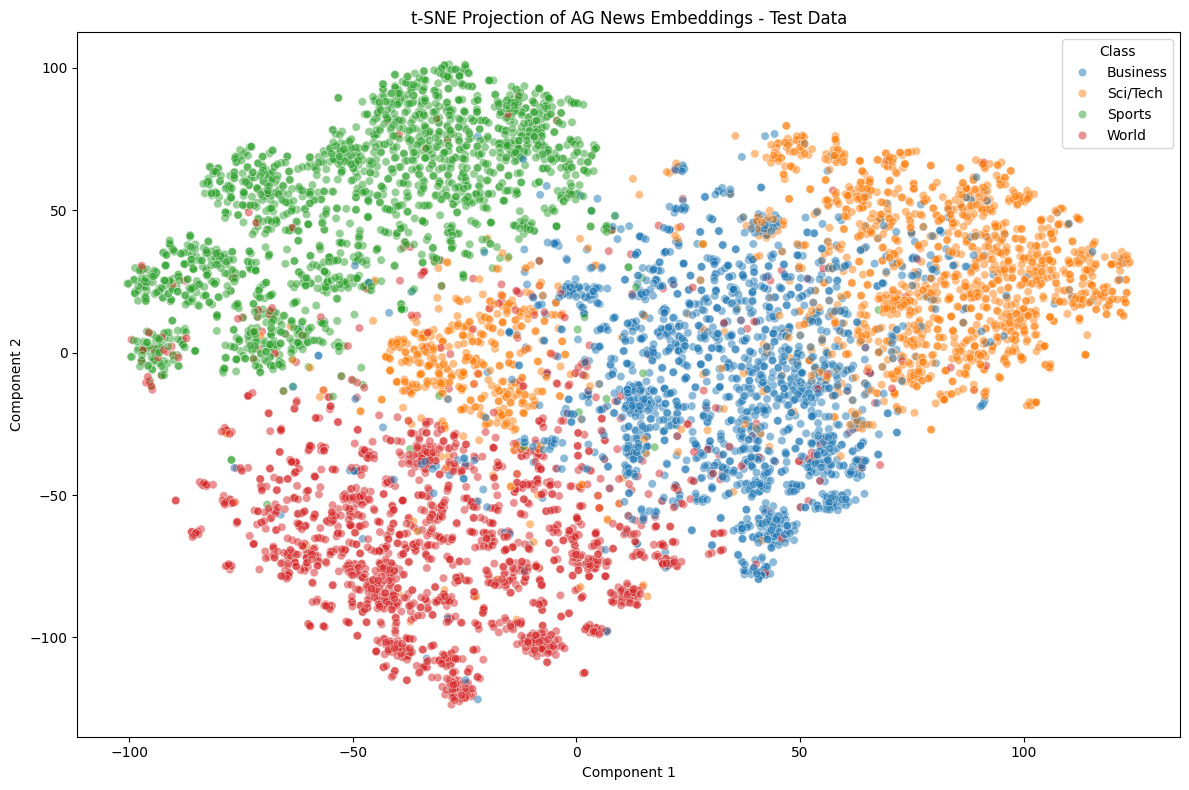

In [13]:
# Create Test Embeddings
test_embeddings = embed(df_test["text"].tolist(), st_model, batch_size = 32, normalize = False)
df_test_emb = pd.DataFrame(test_embeddings)

# Create Test t-SNE Model
tsne_model = TSNE(n_components = 2, random_state = 42, perplexity = 30, max_iter = 2500)
tsne_2d = tsne_model.fit_transform(df_test_emb)

# Show plot
plot_projection(tsne_2d, "t-SNE Projection of AG News Embeddings - Test Data", df_test)